In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
pd.options.mode.chained_assignment = None 

In [29]:
dataset = pd.read_excel('Entrada_simulacion_continuo.xlsx', sheet_name="Program_data", engine='openpyxl')

In [30]:
umax = dataset['umax'].iloc[0]
ks = dataset['Ks'].iloc[0]
yield_xs = dataset['X/S'].iloc[0]
yield_px = dataset['P/X'].iloc[0]
tiempo_sim= (dataset['Tiempo'].iloc[0])+1
kd = dataset['Kd'].iloc[0]
gamma = dataset['Gamma'].iloc[0]
d = dataset['D'].iloc[0]
so = dataset['So'].iloc[0]

In [31]:
dataset = dataset.iloc[:,0:4]
dataset['Tiempo'].iloc[0] = 0

In [32]:
for n in range (1,tiempo_sim):
    u_new = (umax * dataset['Sustrato'].iloc[n-1])/(ks + dataset['Sustrato'].iloc[n-1])
    tiempo = n
    biomasa = (u_new) * dataset['Biomasa'].iloc[n-1]+ dataset['Biomasa'].iloc[n-1] - dataset['Biomasa'].iloc[n-1] * kd - d*dataset['Biomasa'].iloc[n-1]
    sustrato = dataset['Sustrato'].iloc[n-1] - (1/yield_xs) * u_new * dataset['Biomasa'].iloc[n-1] + d*(so -dataset['Sustrato'].iloc[n-1])
    producto = yield_px * u_new * dataset['Biomasa'].iloc[n-1] - dataset['Producto'].iloc[n-1] * gamma + dataset['Producto'].iloc[n-1] - d*dataset['Producto'].iloc[n-1]
    nuevo_renglon = pd.DataFrame([[tiempo, biomasa, sustrato, producto]], columns=dataset.columns)
    dataset = pd.concat([dataset, nuevo_renglon], ignore_index=True)

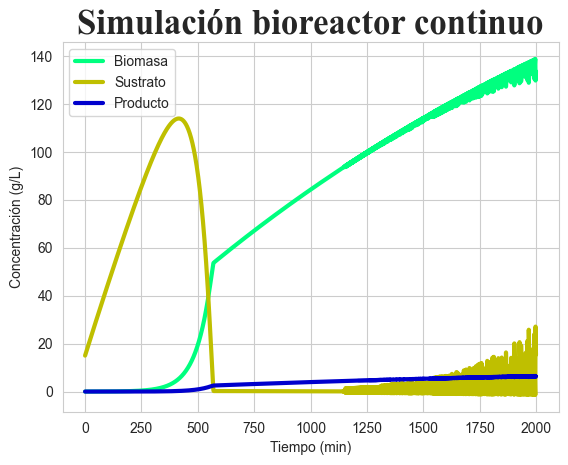

In [33]:
fig, ax = plt.subplots()
variables=['Biomasa','Sustrato','Producto']
colors=['springgreen','y','mediumblue']
for variable,color in zip(variables,colors):
    sns.lineplot(ax=ax, data= dataset, x='Tiempo',y=variable, color=color, linewidth = 3, label = variable )
    last_x = dataset['Tiempo'].iloc[-1] + 10
    last_y = dataset[variable].iloc[-1]  
plt.xlabel('Tiempo (min)')
plt.ylabel('Concentración (g/L)')
plt.title('Simulación bioreactor continuo', font='Times new roman', weight = 'bold', size= 25)
plt.legend()
